# PW4 - Linear Regression
Authors: Daniel Ribeiro and Bastien Veuthey

## Imports

In [26]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [27]:
datafile = "lausanne-appart.csv"

Read the data

In [28]:
dataset = pd.read_csv(datafile)

Display first rows

In [29]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


## Exercise 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

<function matplotlib.pyplot.show(close=None, block=None)>

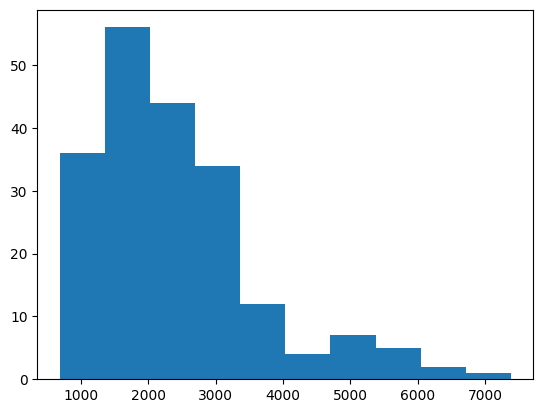

In [30]:
# Your code here
plt.hist(dataset['rent_price'])
plt.show

b) Plot a histogram to visualize the distribution of the living area

<function matplotlib.pyplot.show(close=None, block=None)>

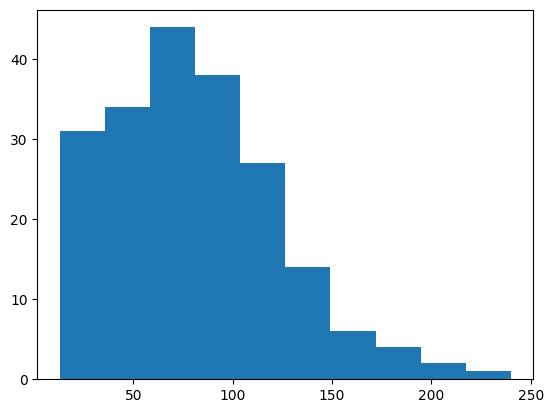

In [31]:
# Your code here
plt.hist(dataset['living_area'])
plt.show

c) Plot a scatter plot of renting price as a function of living area

Dans ce cas, nous allons représenter la variable "living area" sur l'axe des X. Lorsque nous considérons la fonction f(x), où x représente la superficie en mètres carrés, la valeur correspondante en francs suisses (CHF) sera représentée sur l'axe des Y.

<function matplotlib.pyplot.show(close=None, block=None)>

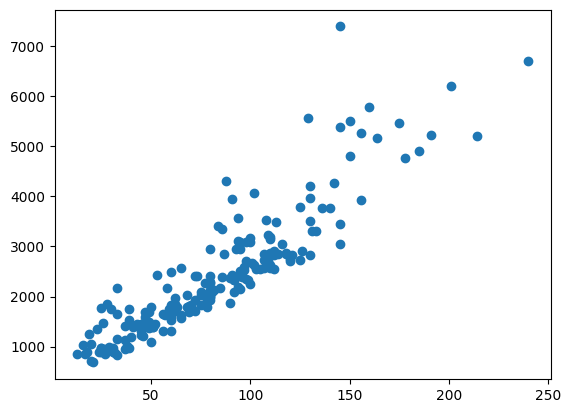

In [32]:
# Your code here
plt.scatter(dataset['living_area'],dataset['rent_price'])
plt.show

## Exercise 2 - Normal equations for linear regression


a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

In [33]:
X = dataset["living_area"].values
y = dataset["rent_price"].values
X.shape, y.shape
# Your code here
x0  = np.ones(len(X))
X_tot = np.column_stack((x0, X)) # Regarder slide 21 (on voit qu'on doit ajouter la colonne de 1)
# Calcul theta 
theta = np.linalg.inv(X_tot.T.dot(X_tot)).dot(X_tot.T).dot(y)

theta

array([240.07710727,  26.33242457])

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [34]:
theta

array([240.07710727,  26.33242457])

In [35]:
X_tot

array([[  1.,  69.],
       [  1.,  95.],
       [  1.,  21.],
       [  1.,  20.],
       [  1.,  33.],
       [  1.,  13.],
       [  1.,  17.],
       [  1.,  27.],
       [  1.,  32.],
       [  1.,  26.],
       [  1.,  25.],
       [  1.,  31.],
       [  1.,  18.],
       [  1.,  24.],
       [  1.,  25.],
       [  1.,  25.],
       [  1.,  27.],
       [  1.,  37.],
       [  1.,  28.],
       [  1.,  39.],
       [  1.,  31.],
       [  1.,  25.],
       [  1.,  25.],
       [  1.,  29.],
       [  1.,  38.],
       [  1.,  16.],
       [  1.,  20.],
       [  1.,  50.],
       [  1.,  37.],
       [  1.,  33.],
       [  1.,  40.],
       [  1.,  46.],
       [  1.,  45.],
       [  1.,  19.],
       [  1.,  45.],
       [  1.,  56.],
       [  1.,  60.],
       [  1.,  23.],
       [  1.,  49.],
       [  1.,  51.],
       [  1.,  48.],
       [  1.,  51.],
       [  1.,  41.],
       [  1.,  47.],
       [  1.,  45.],
       [  1.,  47.],
       [  1.,  37.],
       [  1.,

In [36]:
"""
Afin de comprendre le calcul voici les différentes étapes effectués : 

1. On calcul theta
2. Le calcul de theta trouvé avant est de dimensions de 2. On a donc 2 valeurs [240.07, 26.33]
3. Nous avons aussi X_tot qui lui possède dans la colonne 1 que des 1 et dans la colonne 2 les tailles des appartements (living area)
4. Pour trouver la valeur h0(x) : on va faire un produit matricielle entre la variable theta et la variable X_tot. X_tot.dot(theta) = Cela va produire le calcul theta0*[x0] + theta1*x[1]
5. Donc maintenant, on peut utiliser le theta(x) dans la cost function (mse_loss)
"""

theta_xn = X_tot.dot(theta) # voir point 4

# calcul du cost function 
squared_diff = (theta_xn - y) ** 2
cost_from_exercise_2 = (1 / (2 * len(y))) * np.sum(squared_diff)

print("Overall cost value J(θ):", cost_from_exercise_2)


Overall cost value J(θ): 138034.95779787414


## MSE Loss

![MSELoss](../images/mse_loss.png)

## Exercise 3 - Gradient descent for linear regression

Implement the _full batch_ gradient descent algorithm for the previous problem. As seen in the
theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})$</center></div><div style="display: table-cell; width: 100%;">$(6)$</div></div>

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,1}$</center></div><div style="display: table-cell; width: 100%;">$(7)$</div></div>

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of $\alpha$. Values such as $0.000001$ are common.

In [37]:
# Reload the data
X = dataset["living_area"].values
y = dataset["rent_price"].values

# Add a column of ones to X (has seen before)
x0 = np.ones(len(X))
X_tot = np.column_stack((x0, X))

# Initialize theta with zeros (slide 24)
theta = np.zeros(2)  # [theta0, theta1]

alpha = 0.000001  # learning rate
iterations = len(dataset["living_area"])  # number of iterations
plot_tab= []
for _ in range(iterations):
    predicted_prices = X_tot.dot(theta)
    # Compute errors
    errors = predicted_prices - y
    # Update theta using gradient descent update rules
    # Do it for theta 0 and theta 1
    theta[0] = theta[0] - (alpha / len(y)) * np.sum(errors)  # Update theta0
    theta[1] = theta[1] - (alpha / len(y)) * np.sum(errors * X)  # Update theta1
    # The main goal of doing this is to find the perfect theta 0 and theta 1 (minimize the error)
    # this method is very long because we check all the values of the train set (compared to the one we did before)
    # Calculate cost
    cost = (1 / (2 * len(y))) * np.sum(errors ** 2)
    plot_tab.append(cost)
    #print("Iteration {}, Cost: {}".format(_, cost))
    
# Calculate the overall cost value J(θ) has done the exercice 2B
predicted_prices = X_tot.dot(theta)
squared_diff = (predicted_prices - y) ** 2
cost_exo3 = (1 / (2 * len(y))) * np.sum(squared_diff)

print("Optimal theta:", theta)

Optimal theta: [ 0.23681468 23.37592505]


In [38]:
type(theta)

numpy.ndarray

a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe?

In [39]:
print("Overall cost value J(θ):", cost)

Overall cost value J(θ): 262975.5116831863


Il est observé que notre valeur de cost value est techniquement supérieure à celle obtenue précédemment. Suite à une discussion avec le responsable du cours, il apparaît que ce phénomène est normal. En réalité, cela indique simplement qu'il reste des opportunités d'optimisation pour notre cost valeu. Il est nécessaire d'itérer plusieurs fois afin de réduire davantage notre coût dans ce même calcul afin d'obtenir un peu prêt la même valeur.

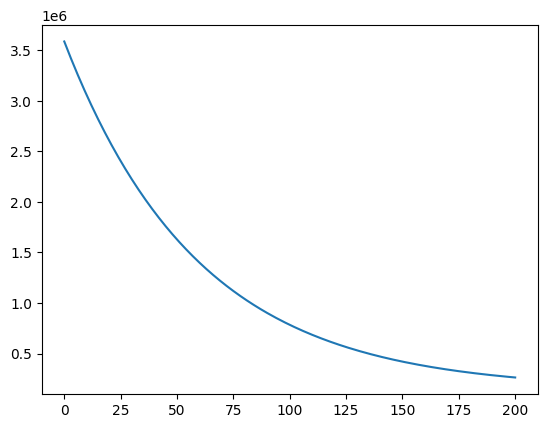

In [40]:
plt.plot(plot_tab)
plt.show()

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set?

Afin de stopper l'itération sur le set d'entrainement, il serait intéressant de surveiller attentivement la réduction de l'erreur. Lorsque celle-ci cesse de diminuer de manière significative ou que la valeur du coût cesse tout simplement de décroître, cela pourrait constituer un indicateur fiable pour mettre fin au processus itératif.

Une deuxième possiblité serait de tout simplement définir une limite d'itérations afin de ne aller à l'infini. 

c) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

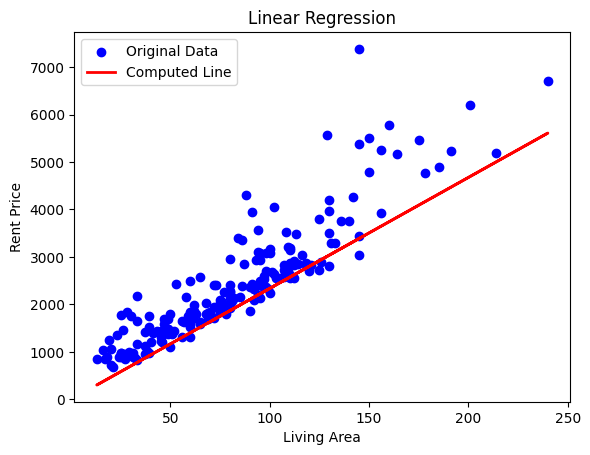

In [41]:
# Your code here

# Scatter plot of the original data (exercise 1)
plt.scatter(X, y, color='blue', label='Original Data')

# Plot the computed line (regression line)
plt.plot(X, predicted_prices, color='red', linewidth=2, label='Computed Line')

# Set labels and title
plt.xlabel('Living Area')
plt.ylabel('Rent Price')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude?

In [42]:
# Your code here
final_predicted_prices = X_tot.dot(theta)
final_cost = (1 / (2 * len(y))) * np.sum((final_predicted_prices - y) ** 2) # Exo 3 final cost value

print("Final Cost Value (Equation 2):", final_cost)
print("Cost Value from Exercise 2:", cost_from_exercise_2)

Final Cost Value (Equation 2): 260992.6395894587
Cost Value from Exercise 2: 138034.95779787414


The cost value achieved in Exercise 2 is lower than that in Exercise 3, indicating that additional iterations are indeed necessary to optimize the model's performance effectively.

## Exercise 4 - Stochastic gradient descent for linear regression

Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{i} \leftarrow \theta_{i} - \alpha (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,i}$</center></div><div style="display: table-cell; width: 100%;">$(8)$</div></div>

In [43]:
X_tot

array([[  1.,  69.],
       [  1.,  95.],
       [  1.,  21.],
       [  1.,  20.],
       [  1.,  33.],
       [  1.,  13.],
       [  1.,  17.],
       [  1.,  27.],
       [  1.,  32.],
       [  1.,  26.],
       [  1.,  25.],
       [  1.,  31.],
       [  1.,  18.],
       [  1.,  24.],
       [  1.,  25.],
       [  1.,  25.],
       [  1.,  27.],
       [  1.,  37.],
       [  1.,  28.],
       [  1.,  39.],
       [  1.,  31.],
       [  1.,  25.],
       [  1.,  25.],
       [  1.,  29.],
       [  1.,  38.],
       [  1.,  16.],
       [  1.,  20.],
       [  1.,  50.],
       [  1.,  37.],
       [  1.,  33.],
       [  1.,  40.],
       [  1.,  46.],
       [  1.,  45.],
       [  1.,  19.],
       [  1.,  45.],
       [  1.,  56.],
       [  1.,  60.],
       [  1.,  23.],
       [  1.,  49.],
       [  1.,  51.],
       [  1.,  48.],
       [  1.,  51.],
       [  1.,  41.],
       [  1.,  47.],
       [  1.,  45.],
       [  1.,  47.],
       [  1.,  37.],
       [  1.,

In [44]:
# Feature normalization - prevent error
X = (X - np.mean(X)) / np.std(X)

In [45]:
import numpy as np
# as usual
X_tot = np.column_stack((np.ones(len(X)), X))
theta = np.zeros(2)
alpha = 0.01
iterations = 2

tab_sto = []
for _ in range(iterations):
    for i in range(len(y)):
        random_index = np.random.randint(0, len(y)) # get random num
        x_i = X_tot[random_index] # get x random value
        y_i = y[random_index] # get y random value
        predicted_price = x_i.dot(theta) # calculate produit matricielle
        error = predicted_price - y_i # error soustraction
        theta[0] -= alpha * error  # Update theta0
        theta[1] -= alpha * error * x_i[1]  # Update theta1
        cost = (1 / (2 * len(y))) * np.sum((X_tot.dot(theta) - y) ** 2)
        tab_sto.append(cost)
# calculate final cost value        
predicted_prices = X_tot.dot(theta)
squared_diff = (predicted_prices - y) ** 2
final_cost_sto = (1 / (2 * len(y))) * np.sum(squared_diff)
# Final theta values after SGD
print("Optimal theta (after SGD):", theta)
print("Final Cost (after SGD):", final_cost_sto)

Optimal theta (after SGD): [2322.27175347 1061.52363647]
Final Cost (after SGD): 140909.1931536526


a) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

In [46]:
final_cost_sto

140909.1931536526

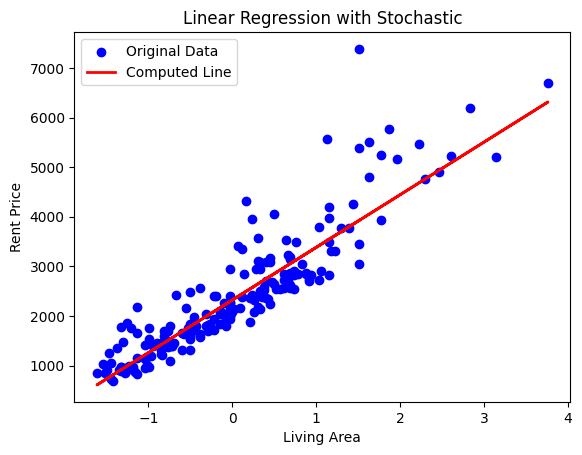

In [47]:
# Your code here
import matplotlib.pyplot as plt


plt.scatter(X, y, color='blue', label='Original Data') # Exercice 1
plt.plot(X, predicted_prices, color='red', linewidth=2, label='Computed Line') # Exercice 4

# Set labels and title
plt.xlabel('Living Area')
plt.ylabel('Rent Price')
plt.title('Linear Regression with Stochastic')
plt.legend()

# Show the plot
plt.show()


b) How many samples do you need to visit for reaching the convergence?

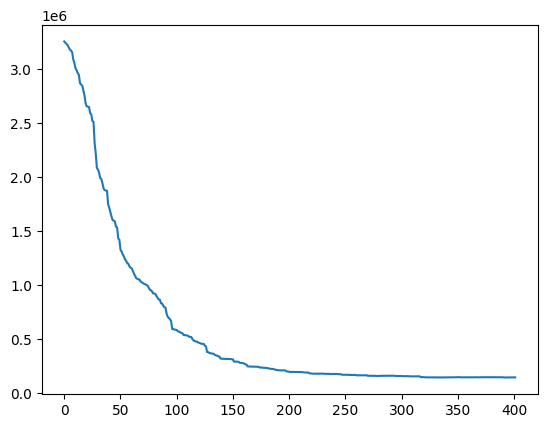

In [48]:
plt.plot(tab_sto)
plt.show()

In this graph with 250 samples, it's evident that convergence is achieved. The algorithm demonstrates fast performance to arrive to an optimum cost value.

c) What kind of stopping criterion could we use here?

1. Set Maximum of iterations : Set a predetermined maximum number of iterations to limit the algorithm's loop count, preventing it from running indefinitely.
2. Implement Change Threshold: Decide on a specific limit that helps determine whether the difference between two consecutive steps is big or small. If the difference is larger than this limit, it's considered significant. If it's smaller, it means the change is minor, helping identify when the process is nearly stable.

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude?

In [49]:

cost_from_exercise_2, cost_exo3, final_cost_sto # exo4

(138034.95779787414, 260992.6395894587, 140909.1931536526)

- Exo 2 got the lowest cost, suggesting it might be the best-performing model among the three.
- Full batch linear regression has a significantly higher cost, indicating that using the entire dataset might not be necessary or suitable for the problem. Maybe we need more training. So it will be more computationally  expensive.
- Stochastic linear regression performed better than full batch but a little worse than Exo 2. However, it could be faster to converge, making it interasting for large datasets.

## Exercise 5 - Review questions

a) The linear regression has a mathematical _closed form_ solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model?

The closed-form solution is efficient for small to medium-sized datasets because it calculates the optimal coefficients directly. Here are the reasons we would prefer the gradient-descent algorithm (slide 23) : 

- **Large Datasets** (especially the stochastic or mini-batch form of gradient descent)
- **Incremental Learning** : In cases where new data points are constantly being added, it's easier to update the model using gradient descent. The "closed-form" solution would require recalculating the entire solution each time new data is added, which can be inefficient. 
- The learning principle is **generalisable** : 

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process? What if we have many outliers? _Hint_: look at the equation of the MSE, and to the equation of the update rule. 



Has we can see in the MSE, we have a **mean** squared error. So in cas of the outlier, the residual (true_value - predicted value) will be very large and squaring these residuals in the MSE formula magnifies their impact. As a result, the MSE becomes large when outliers are present.  Squaring the outliers valuers will make the algorithm overshoot is optimal values (m and b in the equation) leading probably to convergence issues. 

With many outliers, the impact is even bigger. It will be challenging to the algorithm to find the perfect spot to give an accurate and perfect solution. 

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small $\alpha$ value? Could you think of a better (more advanced) strategy as the one stated in Slide 36?

**Alpha to large** 

- **Overshoot Minimum** :  Large steps can cause the algorithm to oscillate around the minimum or even diverge, preventing it from converging to the optimal solution
- **Instability** : It will probably fail to converge
- **Miss minimum** : As said in the first point, it can oscillate around the minimun and never get the optimal value

**Alpha to small** : 
- It will ba very slow, so the convergence will be long

**Strategy** : Would be to adapt the alpha during the training phase. After doing somme reseach the technique AdaGrad was found to be an good alternative. This technique adapts the learning rates of all model parameters based on the historical gradients. This adaptive adjustment helps in handling sparse data and provides a customized learning rate for each parameter, which can improve convergence efficiency.

d) Let's assume we expect that the target variable $y$ has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set $(x_1, \ldots, x_d, \ldots, x_D)$. How would you proceed? Do we need to take precautions in terms of numerical stability?

- **Scale Features** : Ensure all features are scaled to a similar range to prevent domination by large values.
- **Watch Precision** : Use appropriate data types to avoid overflow or loss of precision.
- We can use **Regularization** to prevent overfitting in this terms
- **Feature Selection** : Use methods like feature selection or dimensionality reduction to identify important features and reduce complexity. 

e) _Advanced_. Could we use a descent algorithm without computing the gradient? If yes, give a pseudo code of the algorithm to find $(\theta_{0}, \theta_{1})$ using a linear regression $h_{\theta}(x) = \theta_0 + \theta_1 x$.

Very Hard : 

We have done some research in Google to find something that will do this. And we have found a direct search method as specified in this web page : 

https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method

We don't take credit for this point. We have just done some research to try to understand the question which is very hard to image. 